## PART 3 Download and Explore New York city and its Boroughs Cuisine dataset ##

In [4]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='5a2adf8d-3475-4d13-bc55-a5027d959c33', project_access_token='p-c5c9a25c59ecc901bea1018c7fc26a3657c62b52')
pc = project.project_context

In [5]:
import numpy as np
import pandas as pd
from PIL import Image

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

!conda install -c conda-forge wordcloud==1.4.1 --yes

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.2
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m       conda-forge
    wordcloud:       1.4.1-py36_0      conda-forge

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0                    --> 2020.4.5.2-hecda079_0     conda-forge
    certifi:         2020.4.5.1-py36_0             --> 2020.4.5.2-py36h9f0ad1d_0 conda-forge
    openssl:         1.1.1g-h7b6447c_0             --> 1.1.1g-h516909a_0         conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction

This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [6]:
from project_lib import Project

In [7]:
my_file = project.get_file("cuisine.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
NYC_CUISINE=pd.read_csv(my_file)
NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican,Puerto Rican,Dominican,Korean"
1,The Bronx,Belmont,"Italian,Albanian"
2,The Bronx,City Island,"Italian,Seafood"
3,The Bronx,Morris Park,"Italian,Albanian"
4,The Bronx,Norwood,Filipino


In [8]:
NYC_CUISINE.shape

(58, 3)

In [9]:
print(NYC_CUISINE.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan' nan]


In [10]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,13
Manhattan,13
The Bronx,9
Staten Island,3


### 1. NEW YORK CITY CUISINE - WORD CLOUD ###

In [11]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican,Puerto Rican,Dominican,Korean"
1,"Italian,Albanian"
2,"Italian,Seafood"
3,"Italian,Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican,Dominican"
7,"Jamaican,West Indian"
8,Irish
9,"Greek,Italian,Eastern European,Brazilian,Egypt..."


In [12]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [13]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [14]:
stopwords = set(STOPWORDS)

In [15]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

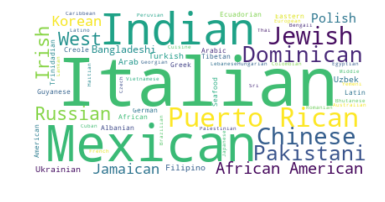

<Figure size 2160x3240 with 0 Axes>

In [16]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### BROOKLYN CUISINE - WORD CLOUD ###

In [17]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish,Italian,Greek,Turkish,Lebanese,Palestini..."
1,Brooklyn,Bedford-Stuyvesant,"African-American,Jamaican,Trinidadian,Puerto R..."
2,Brooklyn,Bensonhurst;,"Italian,Chinese,Turkish,Russian,Mexican,Uzbek"
3,Brooklyn,Borough Park,"Jewish,Italian,Mexican,Chinese"
4,Brooklyn,Brighton Beach,"Russian,Georgian,Turkish,Pakistani,Ukrainian"


In [18]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish,Italian,Greek,Turkish,Lebanese,Palestini..."
1,"African-American,Jamaican,Trinidadian,Puerto R..."
2,"Italian,Chinese,Turkish,Russian,Mexican,Uzbek"
3,"Jewish,Italian,Mexican,Chinese"
4,"Russian,Georgian,Turkish,Pakistani,Ukrainian"
5,"Puerto Rican,Mexican,Dominican,Ecuadorian"
6,"Jamaican,West Indian,African-American"
7,Italian
8,"Jamaican,West Indian,Jewish"
9,"African-American,Dominican,Puerto Rican"


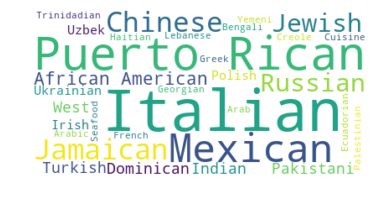

<Figure size 2160x3240 with 0 Axes>

In [19]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()
stopwords = set(STOPWORDS)
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)


# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### QUEENS CUISINE - WORD CLOUD ###

In [20]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek,Italian,Eastern European,Brazilian,Egypt..."
1,Queens,Bellerose,"Indian,Pakistani"
2,Queens,Flushing,"Chinese,Korean"
3,Queens,Forest Hills; Kew Gardens Hills; Rego Park,"Jewish,Russian,Uzbek"
4,Queens,Howard Beach; Ozone Park,Italian


In [21]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek,Italian,Eastern European,Brazilian,Egypt..."
1,"Indian,Pakistani"
2,"Chinese,Korean"
3,"Jewish,Russian,Uzbek"
4,Italian
5,"German,Polish"
6,"Indian,Pakistani,Bangladeshi,Colombian,Ecuador..."
7,"Bangladeshi,Caribbean,African-American,African..."
8,"Arab,Chinese,Italian"
9,"Indian,Guyanese,Trinidadian,Pakistani,Bangladeshi"


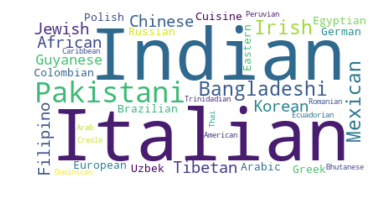

<Figure size 2160x3240 with 0 Axes>

In [22]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)


# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### MANHATTAN CUISINE - WORD CLOUD ###

In [23]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,"Chinese,Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican,Mexican,Dominican,Chinese-Cuban, ..."
2,Manhattan,East Village,"Japanese,Korean,Indian,Ukrainian"
3,Manhattan,Greenwich Village,"Italian,Middle Eastern"
4,Manhattan,Harlem,"Italian,African-American,Latin American,West I..."


In [24]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,"Chinese,Vietnamese"
1,"Puerto Rican,Mexican,Dominican,Chinese-Cuban, ..."
2,"Japanese,Korean,Indian,Ukrainian"
3,"Italian,Middle Eastern"
4,"Italian,African-American,Latin American,West I..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican,Jewish,Italian,Latin American"
9,"Indian,Pakistani,Bangladeshi"


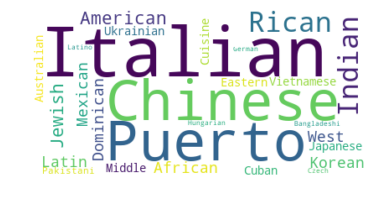

<Figure size 2160x3240 with 0 Axes>

In [25]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### THE BRONX CUISINE - WORD CLOUD ###

In [26]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican,Puerto Rican,Dominican,Korean"
1,The Bronx,Belmont,"Italian,Albanian"
2,The Bronx,City Island,"Italian,Seafood"
3,The Bronx,Morris Park,"Italian,Albanian"
4,The Bronx,Norwood,Filipino


In [27]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican,Puerto Rican,Dominican,Korean"
1,"Italian,Albanian"
2,"Italian,Seafood"
3,"Italian,Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican,Dominican"
7,"Jamaican,West Indian"
8,Irish


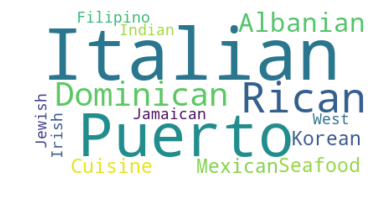

<Figure size 2160x3240 with 0 Axes>

In [28]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()
stopwords = set(STOPWORDS)


# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()